In [1]:
import qutip
import numpy as np
from scipy import sparse

In [2]:
Id = sparse.csr_matrix(np.eye(2))
Sx = sparse.csr_matrix([[0., 1.], [1., 0.]])
Sz = sparse.csr_matrix([[1., 0.], [0., -1.]])
Splus = sparse.csr_matrix([[0., 1.], [0., 0.]])
Sminus = sparse.csr_matrix([[0., 0.], [1., 0.]])

def singesite_to_full(op, i, L):
    op_list = [Id]*L  # = [Id, Id, Id ...] with L entries
    op_list[i] = op
    full = op_list[0]
    for op_i in op_list[1:]:
        full = sparse.kron(full, op_i, format="csr")
    return full


def gen_sx_list(L):
    return [singesite_to_full(Sx, i, L) for i in range(L)]


def gen_sz_list(L):
    return [singesite_to_full(Sz, i, L) for i in range(L)]

def gen_hamiltonian_random_h(L, W, J=1.):
    """ assumes open boundary conditions """
    sx_list = gen_sx_list(L)
    sz_list = gen_sz_list(L)
    H = sparse.csr_matrix((2**L, 2**L))
    K = []
    for j in range(L-1):
        h = np.random.uniform(-W, W)
        K.append(h)
        H = H - J *( sx_list[j] * sx_list[(j+1)%L])
        H = H - h * sz_list[j]
    h = np.random.uniform(-W, W)
    K.append(h)
    H = H - np.random.uniform(-W, W) * sz_list[-1]
    return H, K

def gen_hamiltonian_lists(L, h, J):
    sx_list = gen_sx_list(L)
    sy_list = gen_sy_list(L)
    sz_list = gen_sz_list(L)
    H = sparse.csr_matrix((2 ** L, 2 ** L))
    H = H + J*(sx_list[0] * sx_list[1] + sy_list[0] * sy_list[1] + sz_list[0] * sz_list[1]) - h[0]*sz_list[0]
    for i in range(1, L-1):
        H += + J*(sx_list[i] * sx_list[i+1] + sy_list[i] * sy_list[i+1] + sz_list[i] * sz_list[i+1]) - h[i]*sz_list[i]
    return H

In [8]:
from qutip.qobj import Qobj
import matplotlib.pyplot as plt 

W=8
hs = np.random.uniform(-W, W, 10)
H = gen_hamiltonian_lists(10, W=W, J=1.)
h = hs
E, v = qutip.Qobj(H).groundstate() 
v = np.asarray(v)
spin_list=[np.tensordot(singesite_to_full(Sz, i, L=10)@v, v, axes=2) for i in range(0, 10)]

print(np.array(h))
print(np.array(spin_list))

fig, ax = plt.subplots()
# plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.title("$\hat{S}_{zi}$ and $h_i$ at $W=$"+str(W)+".0 J, system size $L=10$")
plt.text(-1, -1.5, "$\hat{S}_z$:", horizontalalignment='center')
plt.text(-1, -2., "$h_i$:", horizontalalignment='center')
for i in range(len(spin_list)):
    plt.arrow(i, 0, 0, np.real(spin_list[i]), width=0.1, head_width=0.5, head_length=0.2, color='#071013', length_includes_head=True)
    plt.scatter(i,0, 200, '#75abbc')
    # plt.plot(i,i)
    plt.text(i, -1.5, format(np.real(spin_list[i]), ".2f"), horizontalalignment='center')
    plt.text(i, -2., format(np.real(h[i]), ".2f"), horizontalalignment='center')
plt.xlim(-2, len(spin_list))
plt.ylim(-2.5, 1.5)

plt.tight_layout()
fig.patch.set_visible(False)
ax.axis('off')

plt.show()

TypeError: gen_hamiltonian_lists() got an unexpected keyword argument 'W'

[-0.32312459  0.40835278  0.28324504  0.33988671  0.4777935  -0.3663534
  0.03166194  0.03720731  0.05427421 -0.03762819]
[-0.32516401+0.j  0.21700374+0.j  0.14660135+0.j  0.17425142+0.j
  0.23936108+0.j -0.18520989+0.j  0.01611719+0.j  0.01860986+0.j
  0.02714227+0.j -0.02263644+0.j]


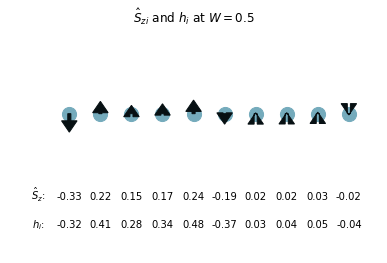

In [4]:
from qutip.qobj import Qobj
import matplotlib.pyplot as plt 

W=0.5
H, h = gen_hamiltonian_random_h(10, W=W, J=1.)
E, v = qutip.Qobj(H).groundstate() 
v = np.asarray(v)
spin_list=[np.tensordot(singesite_to_full(Sz, i, L=10)@v, v, axes=2) for i in range(0, 10)]

print(np.array(h))
print(np.array(spin_list))

fig, ax = plt.subplots()
# plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.title("$\hat{S}_{zi}$ and $h_i$ at $W=$"+str(W))
plt.text(-1, -1.5, "$\hat{S}_z$:", horizontalalignment='center')
plt.text(-1, -2., "$h_i$:", horizontalalignment='center')
for i in range(len(spin_list)):
    plt.arrow(i, 0, 0, np.real(spin_list[i]), width=0.1, head_width=0.5, head_length=0.2, color='#071013', length_includes_head=True)
    plt.scatter(i,0, 200, '#75abbc')
    # plt.plot(i,i)
    plt.text(i, -1.5, format(np.real(spin_list[i]), ".2f"), horizontalalignment='center')
    plt.text(i, -2., format(np.real(h[i]), ".2f"), horizontalalignment='center')
plt.xlim(-2, len(spin_list))
plt.ylim(-2.5, 1.5)

plt.tight_layout()
fig.patch.set_visible(False)
ax.axis('off')

plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.44559301e-15+0.j -1.06767656e-16+0.j -1.34523232e-16+0.j
 -1.90034383e-16+0.j -1.60544084e-16+0.j -1.46666296e-16+0.j
 -1.01663012e-15+0.j  6.68003216e-16+0.j -1.52555462e-15+0.j
 -2.10942375e-15+0.j]


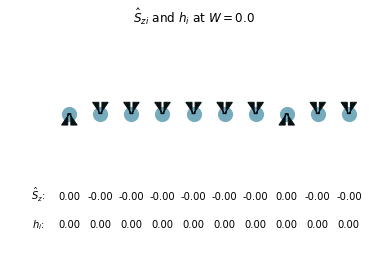

In [5]:
from qutip.qobj import Qobj
import matplotlib.pyplot as plt 

W=0.0
H, h = gen_hamiltonian_random_h(10, W=W, J=1.)
E, v = qutip.Qobj(H).groundstate() 
v = np.asarray(v)
spin_list=[np.tensordot(singesite_to_full(Sz, i, L=10)@v, v, axes=2) for i in range(0, 10)]

print(np.array(h))
print(np.array(spin_list))

fig, ax = plt.subplots()
# plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.title("$\hat{S}_{zi}$ and $h_i$ at $W=$"+str(W))
plt.text(-1, -1.5, "$\hat{S}_z$:", horizontalalignment='center')
plt.text(-1, -2., "$h_i$:", horizontalalignment='center')
for i in range(len(spin_list)):
    plt.arrow(i, 0, 0, np.real(spin_list[i]), width=0.1, head_width=0.5, head_length=0.2, color='#071013', length_includes_head=True)
    plt.scatter(i,0, 200, '#75abbc')
    # plt.plot(i,i)
    plt.text(i, -1.5, format(np.real(spin_list[i]), ".2f"), horizontalalignment='center')
    plt.text(i, -2., format(np.real(h[i]), ".2f"), horizontalalignment='center')
plt.xlim(-2, len(spin_list))
plt.ylim(-2.5, 1.5)

plt.tight_layout()
fig.patch.set_visible(False)
ax.axis('off')

plt.show()

In [20]:
import

ket = v
plot_qubism(ket, theme='light', how='pairs', grid_iteration=1, legend_iteration=0, fig=None, ax=None, figsize=(6, 6))

NameError: name 'plot_qubism' is not defined

In [39]:
np.random.uniform(-10, 10)

1.523487447556036